# 04. disha2sinha/Employee-Salary-Prediction

## Predictions with ML Regression Models - empsalupdated.csv

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Lasso, Ridge, QuantileRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, get_scorer_names
df = pd.read_csv('04_empsalupdated.csv')

In [131]:
# Show the whole dataset
df

,empno,empname,dob,sex,city,state,expyr,salary,hra,Age,conv,total
0,12556,Supriya Awasthi,1987-11-25,F,Nasik,Maharashtra,4.0,62000,8000,32,6200.0,76200.0
1,20101,Rishav Sen,1980-05-13,M,Kolkata,West Bengal,10.0,122131,10000,39,12213.1,144344.1
2,20669,Varun Mitra,1959-05-13,M,Chennai,Tamil Nadu,5.5,80000,6600,60,8000.0,94600.0
3,22781,Pradip Lal,1995-04-20,M,Kharagpur,West Bengal,1.3,42500,7500,24,4250.0,54250.0
4,23819,Biplab Mitra,1974-07-18,M,Kolkata,West Bengal,10.2,122000,8900,45,12200.0,143100.0
5,30955,Joydip Bose,1985-12-28,M,Kolkata,West Bengal,5.2,75000,6500,34,7500.0,89000.0
6,31504,Aminul Islam,1990-12-13,M,Mumbai,Maharashtra,3.5,62500,5500,29,6250.0,74250.0
7,32190,Himadri Sinha,1985-11-30,M,Hyderabad,Andhra Pradesh,7.0,92500,8500,34,9250.0,110250.0
8,37621,Ajay Sharma,1986-05-16,M,Mumbai,Maharashtra,4.1,64500,5000,33,6450.0,75950.0
9,44231,Deblina Bannerjee,1980-05-19,F,Vizag,Andhra Pradesh,6.3,76000,6700,39,7600.0,90300.0


In [132]:
# All columns, their counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   empno    26 non-null     int64  
 1   empname  26 non-null     object 
 2   dob      26 non-null     object 
 3   sex      26 non-null     object 
 4   city     26 non-null     object 
 5   state    26 non-null     object 
 6   expyr    26 non-null     float64
 7   salary   26 non-null     int64  
 8   hra      26 non-null     int64  
 9   Age      26 non-null     int64  
 10  conv     26 non-null     float64
 11  total    26 non-null     float64
dtypes: float64(3), int64(4), object(5)
memory usage: 2.6+ KB


In [133]:
# Get stats about numerical columns
df.describe()

,empno,expyr,salary,hra,Age,conv,total
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,51707.692308,5.253846,76551.961538,7890.384615,34.423077,7655.196154,92097.542308
std,22483.027070,2.338928,21472.419855,2345.293979,7.365721,2147.241986,24202.119685
min,12556.000000,1.100000,39500.000000,5000.000000,23.000000,3950.000000,54250.000000
25%,31675.500000,3.625000,62200.000000,6125.000000,30.000000,6220.000000,75218.750000
50%,55623.000000,5.350000,75700.000000,7550.000000,33.500000,7570.000000,89650.000000
75%,66870.000000,6.675000,91425.000000,8975.000000,38.000000,9142.500000,109330.000000
max,91556.000000,10.200000,122131.000000,15000.000000,60.000000,12213.100000,144344.100000


## Prepare Train and Test Sets

In [134]:
# Create dummy variables from these columns: sex, city, state
dummy_gender = pd.get_dummies(df['sex'], prefix='gender')
dummy_city = pd.get_dummies(df['city'], prefix='city')
dummy_state = pd.get_dummies(df['state'], prefix='state')
df_new = pd.concat([dummy_gender, dummy_city, dummy_state, df['expyr'], df['Age'], df['salary']], axis=1)
df_new.head()

,gender_F,gender_M,city_Bangalore,city_Chennai,city_Delhi,city_Guwahati,city_Hyderabad,city_Kharagpur,city_Kolkata,city_Mangalore,...,state_Assam,state_Delhi,state_Karnataka,state_Maharashtra,state_Tami Nadu,state_Tamil Nadu,state_West Bengal,expyr,Age,salary
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,4.0,32,62000
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,10.0,39,122131
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,5.5,60,80000
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1.3,24,42500
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,10.2,45,122000


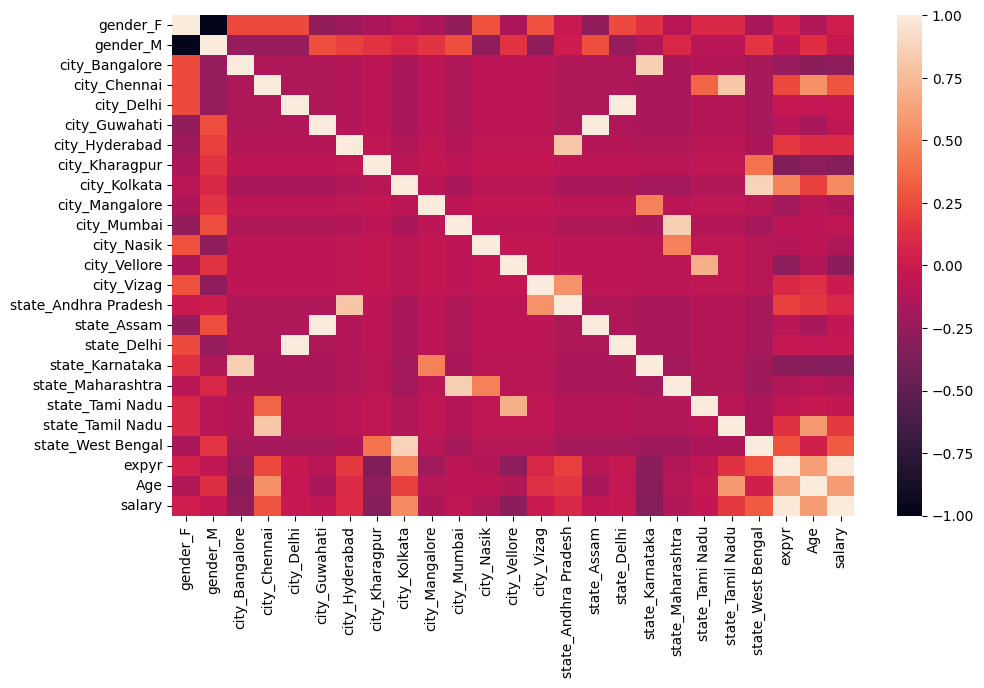

#### CORRELATION VALUES AGAINST SALARIES ####
gender_F                0.028806
gender_M               -0.028806
city_Bangalore         -0.281052
city_Chennai            0.284701
city_Delhi             -0.018216
city_Guwahati          -0.048919
city_Hyderabad          0.101429
city_Kharagpur         -0.323450
city_Kolkata            0.511971
city_Mangalore         -0.145349
city_Mumbai            -0.056066
city_Nasik             -0.138225
city_Vellore           -0.290205
city_Vizag             -0.005243
state_Andhra Pradesh    0.081442
state_Assam            -0.048919
state_Delhi            -0.018216
state_Karnataka        -0.326340
state_Maharashtra      -0.123320
state_Tami Nadu        -0.041843
state_Tamil Nadu        0.173750
state_West Bengal       0.310869
expyr                   0.980828
Age                     0.597126
salary                  1.000000
Name: salary, dtype: float64


In [135]:
# Show the correlations of all concatenated columns in a heat map
plt.figure(figsize=(11,6.5))
sns.heatmap(df_new.corr())
plt.show()
print("#### CORRELATION VALUES AGAINST SALARIES ####")
print(df_new.corr()['salary'])

In [136]:
# Use 80% of the dataset as train set, and 20% as test set
X = df_new.drop(columns='salary', axis=1)
Y = df_new.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.17, random_state=21)
print("TRAIN SIZE:", x_train.shape, y_train.shape, "  TEST SIZE:", x_test.shape, y_test.shape)

TRAIN SIZE: (21, 24) (21,)   TEST SIZE: (5, 24) (5,)


In [137]:
# Create lists to store results of error values of all regression methods
res_mse, res_rmse, res_mae, res_r2, res_cv_train, res_cv_test = [], [], [], [], [], []

# ML Regression Models

## 1 - Linear Regression 

In [138]:
linreg = LinearRegression()
linreg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [139]:
# Fit the training data into the linear reg. model, then make predictions on the test data
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

In [140]:
print("COEF:", linreg.coef_)   # Estimated coefficients for the linear reg.
print("RANK:", linreg.rank_)   # Rank of matrix
print("INTERCEPT:", linreg.intercept_)   # Independent term in the linear model

COEF: [ 4524.40197955 -4524.40197955 -5486.78658701 -2507.27402712
 -3134.91874256  3815.85727108   760.52664585  4854.04593823
 -1170.46554829  7829.54491981  6123.44860275 -6752.5028814
  3995.53381727 -8327.00940861 -7566.48276276  3815.85727108
 -3134.91874256  2342.7583328   -629.05427865   181.82588887
  1306.43390128  3683.58038994  8994.35322627   260.70322727]
RANK: 15
INTERCEPT: 20537.23900271429


In [141]:
# Compare the predicted values against the actual ones
for i in range(x_test.shape[0]):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

  118636.90999111545 |   122131
   45850.67217137093 |    60150
   90144.08168150281 |    88200
   74160.49836865392 |    75000
   81031.26321738744 |    92500


In [142]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)         # Mean squared error
print("RMSE:", rmse)       # Root mean squared error
print("MAE:", mae)         # Mean absolute error
print("R2 SCORE:", r2)     # R2 score
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(linreg, X, Y, cv=5, return_train_score=True)    # 5-fold Cross Validation
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 70539116.26060608
RMSE: 8398.756828281557
MAE: 6409.147586595014
R2 SCORE: 0.8343391863052115

# CROSS VALIDATION #
FITTING TIME: [0.00802875 0.002002   0.00354218 0.002002   0.00200224] -> 0.0035154342651367186
SCORING TIME: [0.00357485 0.00099897 0.00300932 0.00099802 0.00101733] -> 0.001919698715209961
TRAIN SCORE: [0.97768809 0.99230945 0.9909149  0.99188943 0.99455837] -> 0.989472049985733
TEST SCORE: [0.98016975 0.6562355  0.81615716 0.92861989 0.10592339] -> 0.6974211376196626


## 2 - Lasso Regression

In [143]:
lasso = Lasso()
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [144]:
# Fit the training data into the lasso model, then make predictions on the test data
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

In [145]:
print("COEF:", lasso.coef_)   # Parameter vector (w in the cost function function formula)
print("INTERCEPT:", lasso.intercept_)   # Independent term in decision function
# Number of iterations run by the coord. descent solver to reach the specified tolerance
print("ITERATIONS:", lasso.n_iter_)   

COEF: [ 8845.8586145     -0.         -3837.11738292 -2371.10516721
 -6816.86501999  6565.07619059    -0.          5765.5431377
     0.          9323.36570598  4693.5967729  -7967.27768993
  3748.23097393 -8868.70481927 -7539.12822705   251.76062072
   -16.4557915     -0.            -0.          -438.19322868
   585.99035522  1859.11538445  8982.30202966   254.43684516]
INTERCEPT: 17071.297680407537
ITERATIONS: 700


In [146]:
# Compare the predicted values against the actual ones
for i in range(x_test.shape[0]):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

  118676.47032263048 |   122131
   46090.17253842016 |    60150
   90066.49974753827 |    88200
   74289.23635446052 |    75000
   81059.13639635139 |    92500


In [147]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)          
print("RMSE:", rmse)       
print("MAE:", mae)        
print("R2 SCORE:", r2)
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(lasso, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 68898977.96117875
RMSE: 8300.540823414987
MAE: 6306.496827135144
R2 SCORE: 0.8381910441063682

# CROSS VALIDATION #
FITTING TIME: [0.00407887 0.00199509 0.00247288 0.00404334 0.00192881] -> 0.0029037952423095702
SCORING TIME: [0.00147581 0.00197792 0.00200772 0.00098705 0.0020349 ] -> 0.0016966819763183593
TRAIN SCORE: [0.97768753 0.9923088  0.99091407 0.99188769 0.9945552 ] -> 0.9894706565797234
TEST SCORE: [0.97941516 0.4741552  0.84203307 0.93140062 0.13558571] -> 0.6725179511439441


## 3 - Ridge Regression

In [148]:
ridge = Ridge()
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [149]:
# Fit the training data into the ridge model, then make predictions on the test data
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

In [150]:
print("COEF:", ridge.coef_)   # Weight vector(s)
print("INTERCEPT:", ridge.intercept_)   # Independent term in decision function
print("ITERATIONS:", ridge.n_iter_)   # Actual number of iterations for each target. (Only for 'sag' & 'lsqr' solvers)

COEF: [  657.99234676  -657.99234676 -2292.22061821  2132.2183003
  -557.69496145  1656.72519763 -1835.90043564   384.18469795
  1047.13401388  2730.36284665  1671.59644538 -1689.44341576
  -638.42979137 -2608.53227935 -4444.43271499  1656.72519763
  -557.69496145   438.14222843   -17.84697037   655.34453456
   838.44397437  1431.31871183  8689.90547636    39.71155374]
INTERCEPT: 28708.34983002158
ITERATIONS: None


In [151]:
# Compare the predicted values against the actual ones
for i in range(x_test.shape[0]):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

  118976.61556841125 |   122131
  54394.588370334954 |    60150
   85294.70903405122 |    88200
   77066.51151318621 |    75000
   83949.55549429316 |    92500


In [152]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
adj_r2 = 1-(1-ridge.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
print("ADJUSTED R2 SCORE:", adj_r2)
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(ridge, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 25779238.169052027
RMSE: 5077.325887615648
MAE: 4486.4086092191255
R2 SCORE: 0.9394575691062079
ADJUSTED R2 SCORE: 0.5271272266772006

# CROSS VALIDATION #
FITTING TIME: [0.0049088  0.00400305 0.00306821 0.0015738  0.0020051 ] -> 0.0031117916107177733
SCORING TIME: [0.00201392 0.00151753 0.0019381  0.00094366 0.00100565] -> 0.001483774185180664
TRAIN SCORE: [0.97294843 0.98932436 0.98782097 0.98489219 0.99072266] -> 0.985141721275929
TEST SCORE: [0.98279415 0.77431036 0.87504603 0.97151848 0.75771212] -> 0.8722762270610577


## 4 - Polynomial Regression

In [153]:
poly_feat = PolynomialFeatures(degree=2)
poly_feat.get_params()

{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

In [154]:
# Fit then transform for both training and test data (the number of columns must increase)
x_poly_train = poly_feat.fit_transform(x_train)
x_poly_test = poly_feat.fit_transform(x_test)
print(x_poly_train.shape, x_poly_test.shape)

(21, 325) (5, 325)


### Polynomial Regression with Lasso

In [155]:
lasso = Lasso()
lasso.fit(x_poly_train, y_train)
y_poly_pred = lasso.predict(x_poly_test)

In [156]:
print("COEF:", lasso.coef_)   # Parameter vector (w in the cost function function formula)
print("INTERCEPT:", lasso.intercept_)   # Independent term in decision function
# Number of iterations run by the coord. descent solver to reach the specified tolerance
print("ITERATIONS:", lasso.n_iter_) 

COEF: [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00 -4.53648357e+03
  8.70265309e+03 -0.00000000e+00 -6.30933100e+02 -0.00000000e+00
 -3.01832946e+03  1.08342879e+04 -0.00000000e+00  1.08785944e+04
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -8.28959783e+01  1.12037770e+03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  7.11034643e+03
 -1.24059930e+02 -0.00000000e+00  0.00000000e+00  5.72582423e+03
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  8.43057611e+02  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  3.99342024e+02
 -3.32983622e+01  0.00000000e+00 -3.27172669e+02  1.35256516e+03
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.70062673e+03  0.00000000e+00
  0.00000000e+00  0

In [157]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_poly_pred), mean_squared_error(y_test, y_poly_pred, squared=False), \
    mean_absolute_error(y_test, y_poly_pred), r2_score(y_test, y_poly_pred)
print("MSE:", mse)          
print("RMSE:", rmse)     
print("MAE:", mae)         
print("R2 SCORE:", r2)    
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(lasso, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 64234377.874577425
RMSE: 8014.63523028824
MAE: 5993.268184209007
R2 SCORE: 0.8491458375156345

# CROSS VALIDATION #
FITTING TIME: [0.00405455 0.00350976 0.0020051  0.00257468 0.00299478] -> 0.0030277729034423827
SCORING TIME: [0.00202608 0.00102329 0.00100017 0.00098968 0.00164938] -> 0.001337718963623047
TRAIN SCORE: [0.97768753 0.9923088  0.99091407 0.99188769 0.9945552 ] -> 0.9894706565797234
TEST SCORE: [0.97941516 0.4741552  0.84203307 0.93140062 0.13558571] -> 0.6725179511439441


### Polynomial Regression with Ridge

In [158]:
ridge = Ridge()
ridge.fit(x_poly_train, y_train)
y_poly_pred = ridge.predict(x_poly_test)

In [159]:
print("COEF:", ridge.coef_)   # Weight vector(s)
print("INTERCEPT:", ridge.intercept_)   # Independent term in decision function
print("ITERATIONS:", ridge.n_iter_)   # Actual number of iterations for each target. (Only for 'sag' & 'lsqr' solvers)

COEF: [ 0.00000000e+00 -7.26660609e+01  7.26660609e+01 -7.27707376e+01
 -5.20017496e+01 -3.13129616e+01 -2.53579881e+01 -1.25778664e+00
  2.66098395e+00 -4.13668911e+00  7.21607834e+00  1.85744576e+02
 -5.36771135e+00  2.99683540e+00 -6.41284994e+00 -7.67063659e+00
 -2.53579881e+01 -3.13129616e+01 -6.55546592e+01  1.80376865e+02
 -7.17962889e-01 -4.82869513e+01 -1.47570516e+00  2.95396058e+02
 -7.51882518e+02 -7.26660609e+01  0.00000000e+00  1.09190865e+02
 -1.38763403e+02 -3.13129616e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.36771135e+00  0.00000000e+00 -6.41284994e+00 -6.41284994e+00
  0.00000000e+00 -3.13129616e+01  1.09190865e+02 -5.36771135e+00
 -3.71479829e+00 -1.35048605e+02  0.00000000e+00  4.11490790e+02
 -3.13173184e+02  7.26660609e+01 -1.81961602e+02  8.67616534e+01
  0.00000000e+00 -2.53579881e+01 -1.25778664e+00  2.66098395e+00
 -4.13668911e+00  7.21607834e+00  1.85744576e+02  0.00000000e+00
  2.99683540e+00  0

In [160]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_poly_pred), mean_squared_error(y_test, y_poly_pred, squared=False), \
    mean_absolute_error(y_test, y_poly_pred), r2_score(y_test, y_poly_pred)
print("MSE:", mse)        
print("RMSE:", rmse)       
print("MAE:", mae)          
print("R2 SCORE:", r2)      
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(ridge, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 182450195.13624507
RMSE: 13507.41259961526
MAE: 12964.624785945183
R2 SCORE: 0.5715164948568692

# CROSS VALIDATION #
FITTING TIME: [0.00325561 0.00262332 0.00200009 0.00199413 0.00201154] -> 0.0023769378662109376
SCORING TIME: [0.0009985  0.00192976 0.00099564 0.00099564 0.00100064] -> 0.0011840343475341796
TRAIN SCORE: [0.97294843 0.98932436 0.98782097 0.98489219 0.99072266] -> 0.985141721275929
TEST SCORE: [0.98279415 0.77431036 0.87504603 0.97151848 0.75771212] -> 0.8722762270610577


## 5 - Random Forest Regression

In [161]:
rforest = RandomForestRegressor(n_estimators=40)
rforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 40,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [162]:
# Fit the training data into the random forest, then make predictions on the test data
rforest.fit(x_train, y_train)
y_pred = rforest.predict(x_test)

In [163]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(rforest, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 64942483.1125
RMSE: 8058.689912913885
MAE: 6218.85
R2 SCORE: 0.8474828553843812

# CROSS VALIDATION #
FITTING TIME: [0.03066635 0.02870345 0.03568673 0.02963996 0.02981639] -> 0.030902576446533204
SCORING TIME: [0.00357342 0.00301313 0.00399876 0.00400758 0.00360417] -> 0.003639411926269531
TRAIN SCORE: [0.97505461 0.98524338 0.98179068 0.98440559 0.98736565] -> 0.9827719797814485
TEST SCORE: [0.70453634 0.87485874 0.94440809 0.82493678 0.77786166] -> 0.8253203220089432


## 6 - Quantile Regression

In [164]:
qr = QuantileRegressor(quantile=0.5, alpha=0, solver='highs-ds')
qr.get_params()

{'alpha': 0,
 'fit_intercept': True,
 'quantile': 0.5,
 'solver': 'highs-ds',
 'solver_options': None}

In [165]:
# Fit the training data into the quantile model, then make predictions on the test data
qr.fit(x_train, y_train)
y_pred = qr.predict(x_test)

In [166]:
print("COEF:", qr.coef_)   # Estimated coefficients for the features
print("INTERCEPT:", qr.intercept_)   # The intercept of the model, a.k.a. bias term
print("FEATURES:", qr.n_features_in_)   # Number of features seen during fit
print("ITERATIONS:", qr.n_iter_)   # The actual number of iterations performed by the solver

COEF: [  8068.95973154      0.              0.              0.
   8493.37248322  22705.03355705   7975.16778523  24523.48993289
  16191.3590604   14290.52013423      0.         -11681.45973154
   7052.18120805   -176.76174497      0.              0.
      0.          11471.1409396   20589.68120805  12993.95973154
  14159.39597315      0.           9288.59060403    245.88926174]
INTERCEPT: 0.0
FEATURES: 24
ITERATIONS: 14


In [167]:
# Compare the predicted values against the actual ones
for i in range(x_test.shape[0]):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

  118666.94630872486 |   122131
  44965.268456375845 |    60150
   88106.20805369128 |    88200
   72852.26510067117 |    75000
   81355.53691275168 |    92500


In [168]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(qr, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 74279271.93159984
RMSE: 8618.542332181229
MAE: 6406.955033557034
R2 SCORE: 0.8255554466633239

# CROSS VALIDATION #
FITTING TIME: [0.00599813 0.00399876 0.00602794 0.00299597 0.00354576] -> 0.004513311386108399
SCORING TIME: [0.00216913 0.00250649 0.00152516 0.00200033 0.00200391] -> 0.002041006088256836
TRAIN SCORE: [0.94883904 0.98794058 0.97851155 0.9830557  0.98873556] -> 0.9774164879021594
TEST SCORE: [ 0.91708356  0.4286689   0.80030252  0.94049193 -0.1467437 ] -> 0.5879606419290597


## 7 - KNN Regression

In [169]:
knnreg = KNeighborsRegressor()
knnreg.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [170]:
# Fit the training data into the KNN regression model, then make predictions on the test data
knnreg.fit(x_train, y_train)
y_pred = knnreg.predict(x_test)

In [171]:
# The distance metric to use. It will be the same as the 'metric' parameter or a synonym of it, e.g. 'euclidean' if the
# metric parameter set to 'minkowski' and 'p' parameter is set to 2.
print("EFFECTIVE METRIC:", knnreg.effective_metric_)
# Additional keyword arguments for the metric function. For most metrics will be same with 'metric_params' parameter,
# but may also contain the 'p' parameter value if the 'effective_metric_' attribute is set to 'miknowski'.
print("EFFECTIVE METRIC PARAMS:", knnreg.effective_metric_params_)
print("FEATURES:", knnreg.n_features_in_)  # Number of features seen during fit
print("FEATURE NAMES:", knnreg.feature_names_in_)  # Names of features seen during fit
print("SAMPLES FIT:", knnreg.n_samples_fit_)  # Number of samples in the fitted data

EFFECTIVE METRIC: euclidean
EFFECTIVE METRIC PARAMS: {}
FEATURES: 24
FEATURE NAMES: ['gender_F' 'gender_M' 'city_Bangalore' 'city_Chennai' 'city_Delhi'
 'city_Guwahati' 'city_Hyderabad' 'city_Kharagpur' 'city_Kolkata'
 'city_Mangalore' 'city_Mumbai' 'city_Nasik' 'city_Vellore' 'city_Vizag'
 'state_Andhra Pradesh' 'state_Assam' 'state_Delhi' 'state_Karnataka'
 'state_Maharashtra' 'state_Tami Nadu' 'state_Tamil Nadu'
 'state_West Bengal' 'expyr' 'Age']
SAMPLES FIT: 21


In [172]:
# Compare the predicted values against the actual ones
for i in range(x_test.shape[0]):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

             93804.0 |   122131
             71720.0 |    60150
             69100.0 |    88200
             74670.0 |    75000
             74670.0 |    92500


In [173]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(knnreg, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 323822325.8
RMSE: 17995.063928755575
MAE: 15431.4
R2 SCORE: 0.23950464893298085

# CROSS VALIDATION #
FITTING TIME: [0.00199628 0.00195241 0.00200725 0.00200129 0.00200629] -> 0.0019927024841308594
SCORING TIME: [0.00654387 0.00658631 0.00799942 0.00654578 0.00499964] -> 0.006535005569458008
TRAIN SCORE: [0.7405323  0.77877337 0.7483691  0.67739437 0.71701153] -> 0.7324161343211331
TEST SCORE: [0.58303939 0.08175731 0.11593118 0.50372671 0.56634955] -> 0.3701608295070146


## 8 - Gradient Boosting

In [174]:
gradBoost = GradientBoostingRegressor()
gradBoost.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [175]:
# Fit the training data into the Gradient boosting regression model, then make predictions on the test data
gradBoost.fit(x_train, y_train)
y_pred = gradBoost.predict(x_test)

In [176]:
print("INIT:", gradBoost.init_)  # The estimator that provides the initial predictions
print("ESTIMATORS (FIRST 5):\n{}".format(gradBoost.estimators_[:5]))  # The collection of fitted sub-estimators
# The number of estimators as selected by early stopping (if 'n_iter_no_change' is specified).
# Otherwise, it is set to 'n_estimators'
print("# OF ESTIMATORS:", gradBoost.n_estimators_)
print("# OF FEATURES:", gradBoost.n_features_in_)  # Number of features seen during fit
print("MAX FEATURES:", gradBoost.max_features_)  # The inferred value of max_features
print("FEATURE IMPORTANCES:", gradBoost.feature_importances_)  # The impurity-based feature importances
# The i'th score 'train_score[i]' is the loss of the model at iteration i on the in-bag sample.
# If subsample == 1, this is the loss on the training data.
print("TRAIN SCORE:\n{}".format(gradBoost.train_score_))

INIT: DummyRegressor()
ESTIMATORS (FIRST 5):
[[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x2BD5BDF2740)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x2BD5BDF2740)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x2BD5BDF2740)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x2BD5BDF2740)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x2BD5BDF2740)]]
# OF ESTIMATORS: 100
# OF FEATURES: 24
MAX FEATURES: 24
FEATURE IMPORTANCES: [2.06713979e-03 1.10627429e-03 3.05164112e-04 6.85099257e-08
 5.58770069e-07 2.85417461e-05 1.49470149e-05 1.30188854e-06
 2.66521006e-02 5.36745577e-08 1.32332325e-03 6.7613739

In [177]:
# Compare the predicted values against the actual ones
for i in range(x_test.shape[0]):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   117059.4428637818 |   122131
    61250.3502093691 |    60150
   77698.40118216531 |    88200
   77069.71148700343 |    75000
   92537.57749036717 |    92500


In [178]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(gradBoost, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 28300031.561429493
RMSE: 5319.777397732869
MAE: 3756.159028158516
R2 SCORE: 0.9335374965751758

# CROSS VALIDATION #
FITTING TIME: [0.02728343 0.01813269 0.01916361 0.01909471 0.01940846] -> 0.020616579055786132
SCORING TIME: [0.00099587 0.         0.00099707 0.00193572 0.0019424 ] -> 0.0011742115020751953
TRAIN SCORE: [0.99999962 0.99999942 0.99999915 0.99999377 0.99999952] -> 0.9999982950291422
TEST SCORE: [0.7566677  0.89894874 0.98285155 0.83928932 0.90363858] -> 0.8762791779634217


## 9 - XGBoost

In [179]:
xgb = xgboost.XGBRegressor()
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [180]:
# Fit the training data into the extreme gradient boosting regression model, then make predictions on the test data
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [181]:
# Compare the predicted values against the actual ones for the top 20 rows
for i in range(x_test.shape[0]):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

      121999.9765625 |   122131
       61376.3984375 |    60150
       98816.1171875 |    88200
       96592.8828125 |    75000
       90475.7578125 |    92500


In [182]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(xgb, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 116914661.79908447
RMSE: 10812.708347083282
MAE: 7118.1328125
R2 SCORE: 0.7254264153957956

# CROSS VALIDATION #
FITTING TIME: [0.04659343 0.04757524 0.04410982 0.04105878 0.04357314] -> 0.04458208084106445
SCORING TIME: [0.00451517 0.00399876 0.00451589 0.00451183 0.00500393] -> 0.004509115219116211
TRAIN SCORE: [1. 1. 1. 1. 1.] -> 0.9999999999997126
TEST SCORE: [0.77417067 0.67744441 0.96812904 0.67228691 0.58427159] -> 0.7352605256634656


## Results of Metrics of All ML Models Together

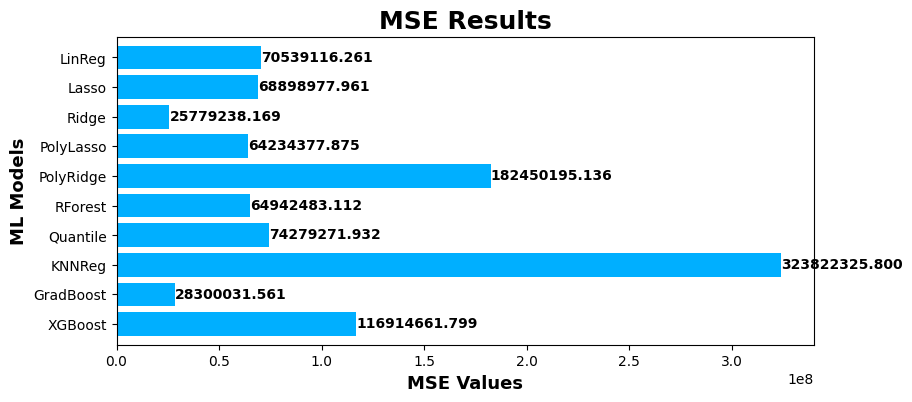

In [183]:
methods = ['LinReg', 'Lasso', 'Ridge', 'PolyLasso', 'PolyRidge', 'RForest', 'Quantile', 'KNNReg', 'GradBoost', 'XGBoost']
plt.figure(figsize=(9,4))
plt.barh(range(10), res_mse, color='#00afff')
plt.title("MSE Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('MSE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_mse[i], i+0.12, "{:.3f}".format(res_mse[i]), fontweight='bold')
plt.show()

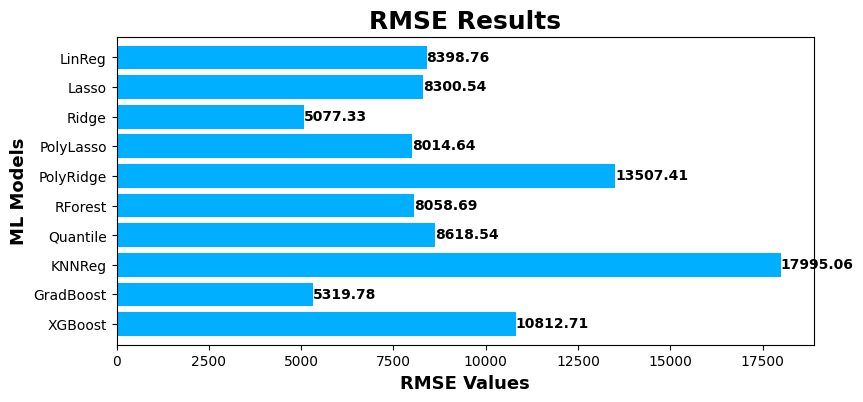

In [184]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_rmse, color='#00afff')
plt.title("RMSE Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('RMSE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_rmse[i], i+0.12, "{:.2f}".format(res_rmse[i]), fontweight='bold')
plt.show()

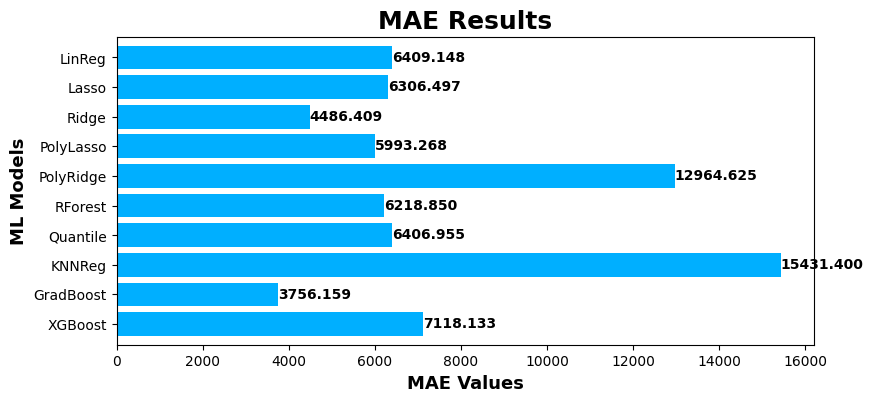

In [185]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_mae, color='#00afff')
plt.title("MAE Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('MAE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_mae[i], i+0.12, "{:.3f}".format(res_mae[i]), fontweight='bold')
plt.show()

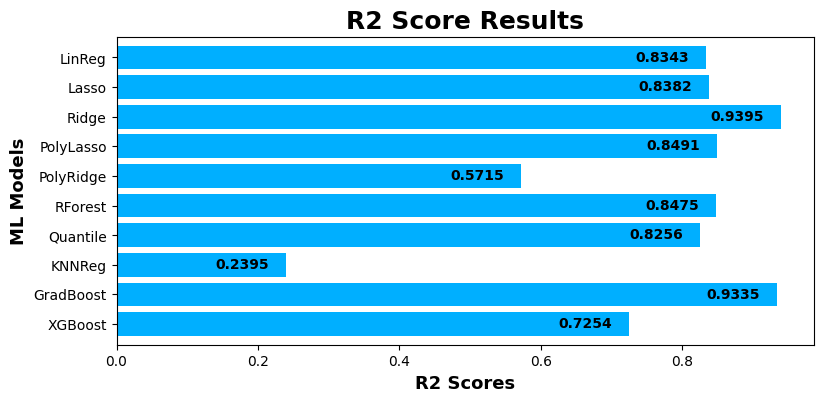

In [186]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_r2, color='#00afff')
plt.title("R2 Score Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('R2 Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_r2[i]-0.1, i+0.12, "{:.4f}".format(res_r2[i]), fontweight='bold')
plt.show()

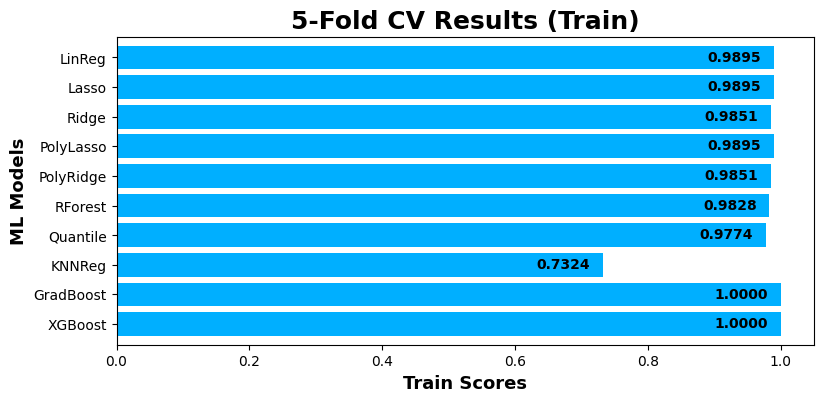

In [187]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_cv_train, color='#00afff')
plt.title("5-Fold CV Results (Train)", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('Train Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_cv_train[i]-0.1, i+0.12, "{:.4f}".format(res_cv_train[i]), fontweight='bold')
plt.show()

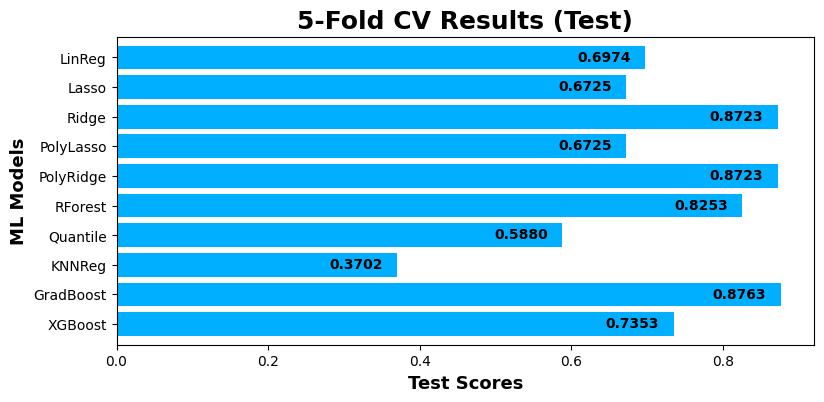

In [188]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_cv_test, color='#00afff')
plt.title("5-Fold CV Results (Test)", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('Test Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_cv_test[i]-0.09, i+0.12, "{:.4f}".format(res_cv_test[i]), fontweight='bold')
plt.show()